In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
df=pd.read_csv("product_review_data.csv")
df

,label,review
0,beauty,Sunscreen is non-greasy and protects well from...
1,home,Mixer grinder works efficiently and makes less...
2,clothing,The shirt fits perfectly and the material feel...
3,electronics,The keyboard feels premium and responsive.
4,beauty,The face cream feels light and absorbs quickly.
...,...,...
495,clothing,"Sweater quality is good, exactly as shown in p..."
496,electronics,The keyboard feels premium and responsive.
497,electronics,This laptop performance is amazing for the price.
498,home,Lamp gives a cozy light perfect for reading.


In [3]:
x=df["review"]
y=df["label"]

In [4]:
Vectorizer=CountVectorizer()
x_vect=Vectorizer.fit_transform(x)
x_vect

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3956 stored elements and shape (500, 205)>

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x_vect,y,test_size=0.2,random_state=42)

In [6]:
model=MultinomialNB()
model.fit(x_train,y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [7]:
y_pred=model.predict(x_test)
y_pred

array(['home', 'electronics', 'beauty', 'home', 'clothing', 'electronics',
       'beauty', 'home', 'electronics', 'clothing', 'home', 'electronics',
       'beauty', 'electronics', 'beauty', 'electronics', 'clothing',
       'electronics', 'clothing', 'clothing', 'clothing', 'electronics',
       'beauty', 'beauty', 'beauty', 'clothing', 'electronics',
       'electronics', 'clothing', 'clothing', 'electronics',
       'electronics', 'electronics', 'beauty', 'clothing', 'electronics',
       'beauty', 'beauty', 'home', 'beauty', 'electronics', 'clothing',
       'beauty', 'home', 'home', 'electronics', 'beauty', 'electronics',
       'electronics', 'electronics', 'home', 'clothing', 'home',
       'electronics', 'home', 'electronics', 'beauty', 'clothing',
       'electronics', 'beauty', 'electronics', 'beauty', 'electronics',
       'beauty', 'beauty', 'electronics', 'electronics', 'home',
       'clothing', 'clothing', 'home', 'beauty', 'beauty', 'electronics',
       'clothing', 'c

In [8]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

1.0

In [9]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[24,  0,  0,  0],
       [ 0, 26,  0,  0],
       [ 0,  0, 31,  0],
       [ 0,  0,  0, 19]])

In [10]:
cross=cross_validate(model,x_vect,y,cv=5,return_train_score=True)
cross

{'fit_time': array([0.00051045, 0.0038414 , 0.00401831, 0.00283909, 0.00201297]),
 'score_time': array([0.        , 0.00200963, 0.        , 0.00202012, 0.00151372]),
 'test_score': array([1., 1., 1., 1., 1.]),
 'train_score': array([1., 1., 1., 1., 1.])}

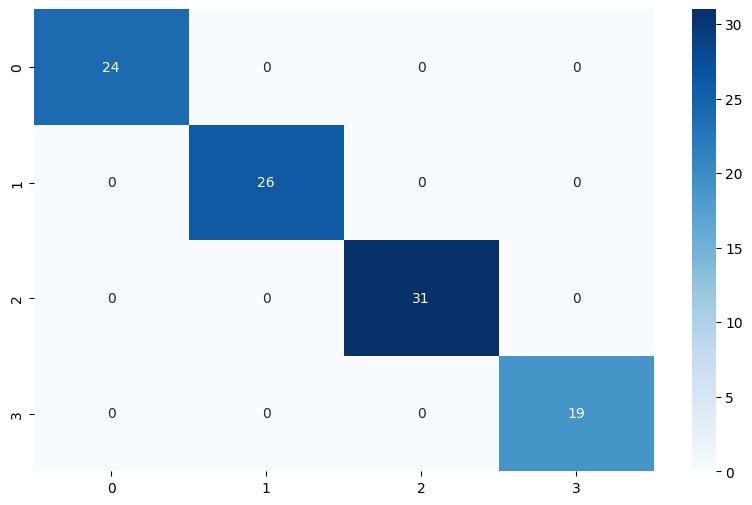

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt='d',cmap="Blues")
plt.show()

In [12]:
new_data=pd.DataFrame({"review":["The keyboard feels premium and responsive."]})
data=Vectorizer.transform(new_data["review"])
predict=model.predict(data)
predict

array(['electronics'], dtype='<U11')